# Lead Scoring Case study

## Problem statement

### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.Now, although X Education gets a lot of leads, its lead conversion rate is very poor.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Importing Necessary Libraries

In [1]:
# libraries and packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

import os 
os.chdir(r'C:\Users\Lovish\.ipython')

In [2]:
# Importing the Leads.csv dataset..!
df_Leads = pd.read_csv('Leads.csv')
df_Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data understanding 

In [3]:
df_Leads.shape  # rows and columns 

(9240, 37)

In [4]:
print(len(df_Leads.columns))  #len of columns 
print('----------------------')
print(df_Leads.columns)    # Names of the columns 

37
----------------------
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      d

In [5]:
# Checking the Info of the dataset 
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the numeric description of the dataset ...!
df_Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning and Checking the Missing Values..!

In [7]:
# Checking the Missing Values 
100*df_Leads.isnull().sum()/len(df_Leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# Checking the Missing Values columns 
for i in df_Leads.columns:
    if df_Leads[i].isnull:
        print(df_Leads[i].value_counts())
        print('x------------------------------------------------------------x')
    

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
x------------------------------------------------------------x
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
x------------------------------------------------------------x
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name

In [9]:
# We have seen few values have been assigned as 'Select' which means the values are not provided.
# Change 'Select' to NaN
df_Leads = df_Leads.replace('Select',np.nan)

In [10]:
# We need to drop the columns which have the Missing Values more than or Equal to 40%,,
100*df_Leads.isnull().sum()/len(df_Leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
#Checking the columns which have Missing Values more than or equal to 40%
print(len(df_Leads.columns[(100*df_Leads.isnull().sum()/len(df_Leads))>=40]))
print(df_Leads.columns[(100*df_Leads.isnull().sum()/len(df_Leads))>=40])

7
Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [12]:
# Stored the Missing value columns into the separate varibles ...! 
null_col = df_Leads.columns[(100*df_Leads.isnull().sum()/len(df_Leads))>=40]
null_col.shape


(7,)

In [13]:
# Dropping the columns 
df_Leads.drop(null_col,axis=1,inplace=True)

In [14]:
df_Leads.shape

(9240, 30)

In [15]:
# Checking again the missing values 
100*df_Leads.isnull().sum()/len(df_Leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [16]:
# Checking the number of unique columns 
df_Leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [17]:
# Dropping the columns with only 1 unique values as it won't contribute much in analysis.
df_Leads=df_Leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [18]:
df_Leads.shape

(9240, 25)

### DATA IMPUTATION 

In [19]:
(100*df_Leads.isnull().sum()/len(df_Leads)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Prospect ID                                       0.0000

In [20]:
# Checking the info 
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
# Filled the Categorial Variables missing values with the Use of Mode 
for i in df_Leads.columns:
    if df_Leads[i].isnull and df_Leads[i].dtype == "object":
        df_Leads[i].fillna(df_Leads[i].mode()[0],inplace=True)
    

In [22]:
(100*df_Leads.isnull().sum()/len(df_Leads)).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Prospect ID                                      0.000000
What matters most to you in choosing a course    0.000000
A free copy of Mastering The Interview           0.000000
City                                             0.000000
Tags                                             0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
Lead Number                                      0.000000
Country                                          0.000000
Last Activity 

In [23]:
# Checking the Info 
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [24]:
# Filled the Numerical Variables missing values with the Use of Median 
for i in df_Leads.columns:
    if df_Leads[i].isnull and df_Leads[i].dtype == "float64" :
        df_Leads[i].fillna(df_Leads[i].median(),inplace=True)

In [25]:
(100*df_Leads.isnull().sum()/len(df_Leads)).sort_values(ascending=False)

Prospect ID                                      0.0
What is your current occupation                  0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
Specialization                                   0.0
Lead Number                                      0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [26]:
df_Leads.shape

(9240, 25)

In [27]:
# Removing Prospect ID,Lead Number from the Dataset as it is not relevant for the analysis
df_Leads=df_Leads.drop(['Prospect ID','Lead Number'],axis=1)

In [28]:
df_Leads.shape

(9240, 23)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [29]:
# Analysis the Categorical Data 
lead_obj_col = []
for i in df_Leads.columns:
    if df_Leads[i].dtype == 'object':
        lead_obj_col.append(i)

In [30]:
print(type(lead_obj_col))
print(lead_obj_col)

<class 'list'>
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [31]:
# Checking the value counts in the lead_obj_col data 
for i in lead_obj_col:
    print(df_Leads[i].value_counts(normalize=True)*100)
    print('x----------------------------------------------x')

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64
x----------------------------------------------x
Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64
x------------------------

Countplot of  Lead Origin


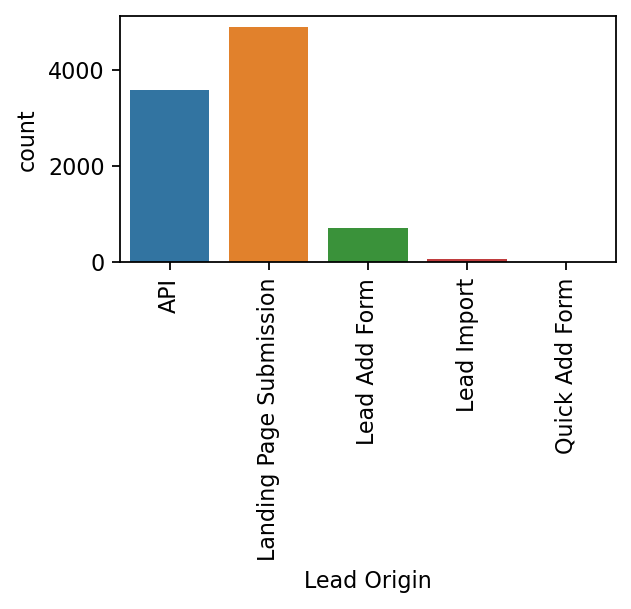

Countplot of  Lead Source


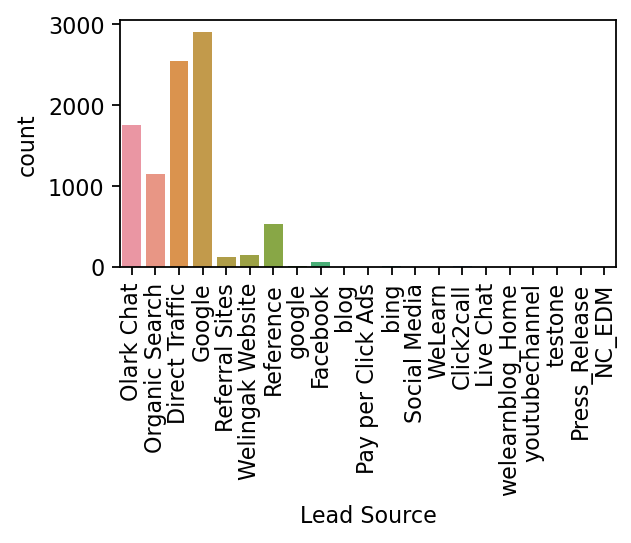

Countplot of  Do Not Email


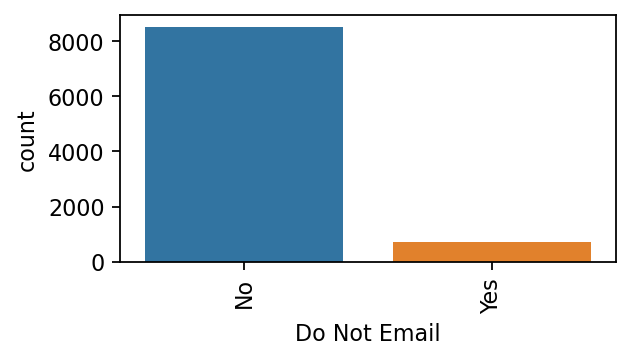

Countplot of  Do Not Call


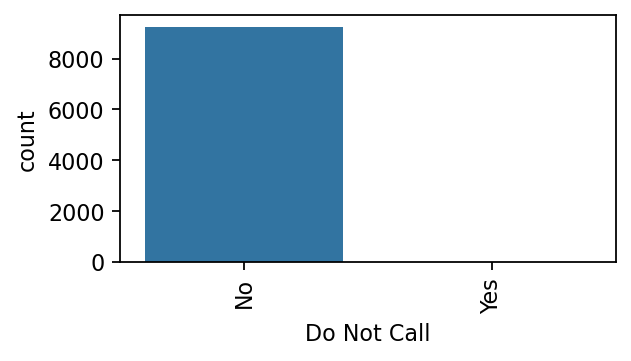

Countplot of  Last Activity


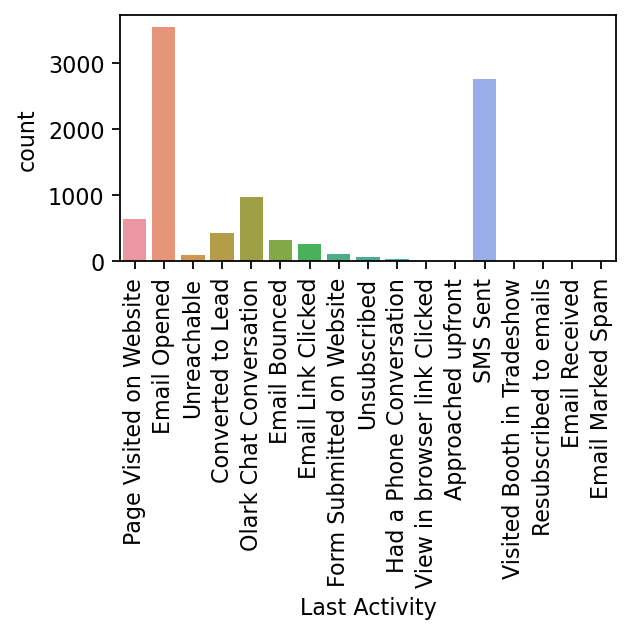

Countplot of  Country


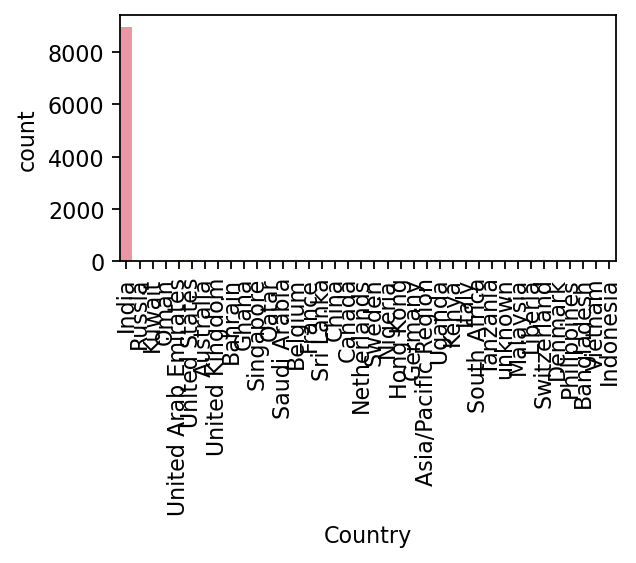

Countplot of  Specialization


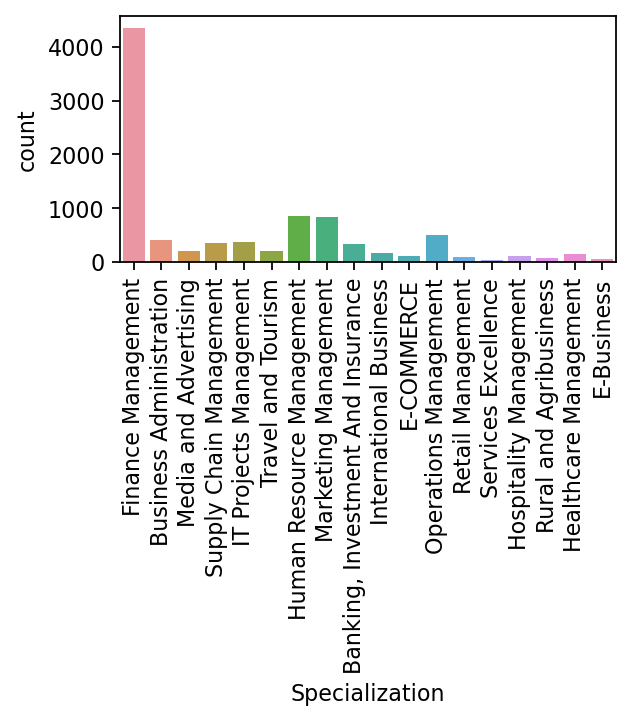

Countplot of  What is your current occupation


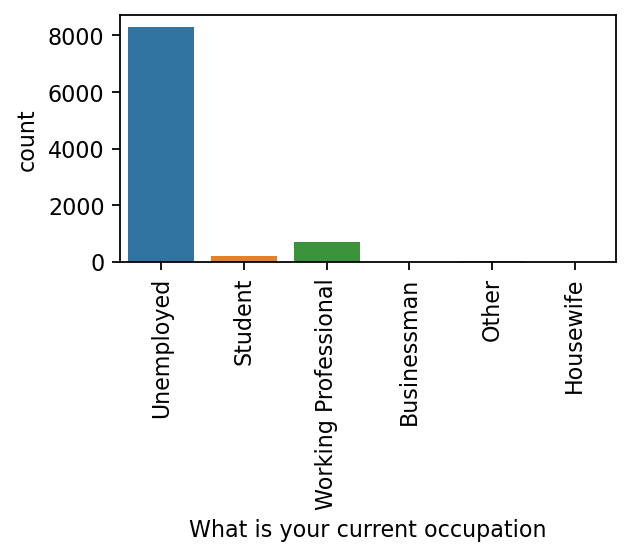

Countplot of  What matters most to you in choosing a course


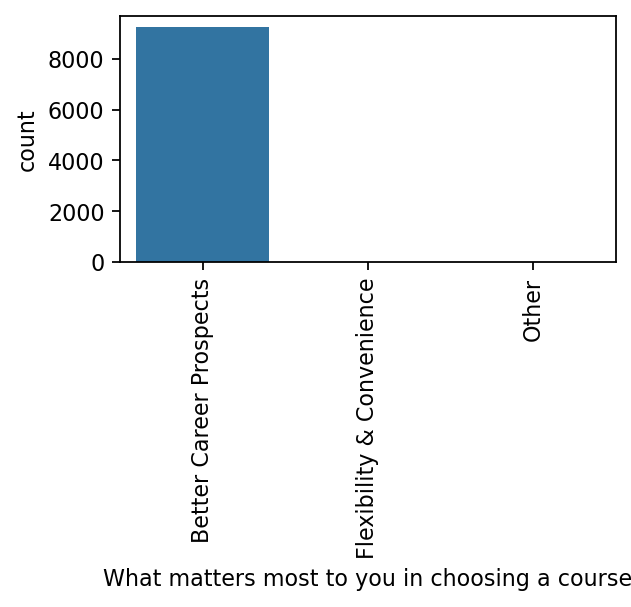

Countplot of  Search


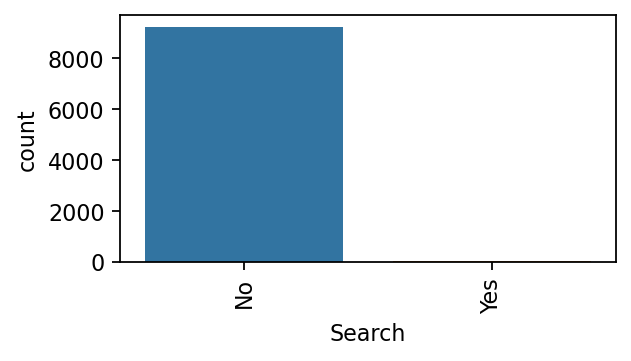

Countplot of  Newspaper Article


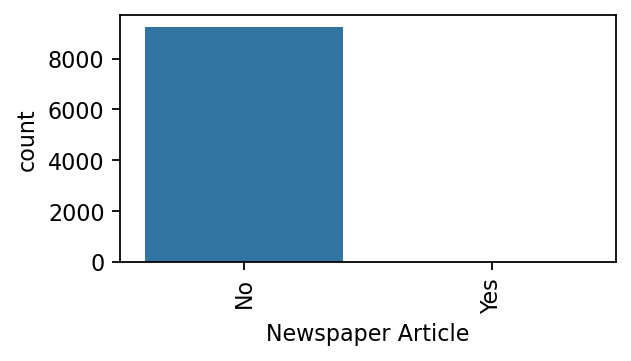

Countplot of  X Education Forums


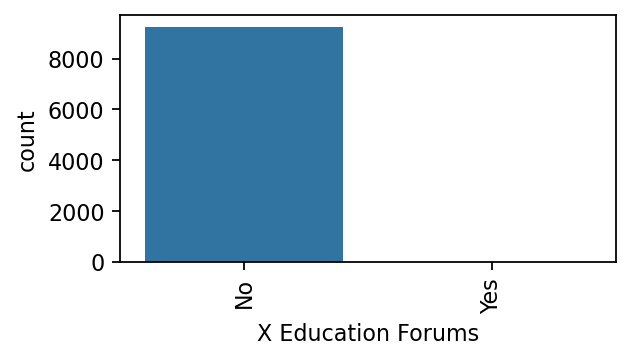

Countplot of  Newspaper


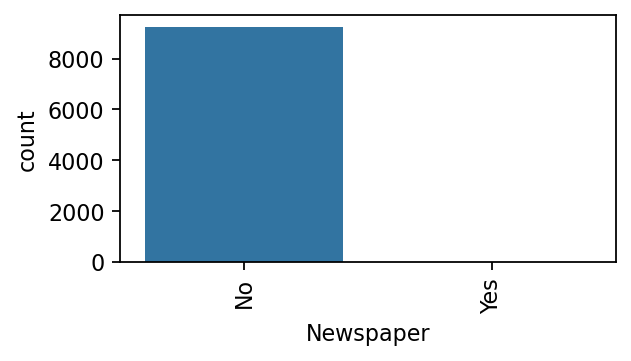

Countplot of  Digital Advertisement


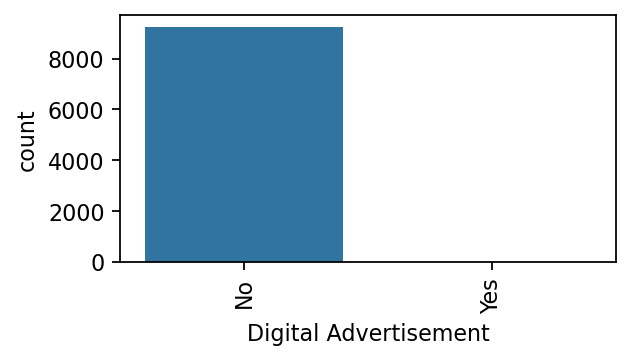

Countplot of  Through Recommendations


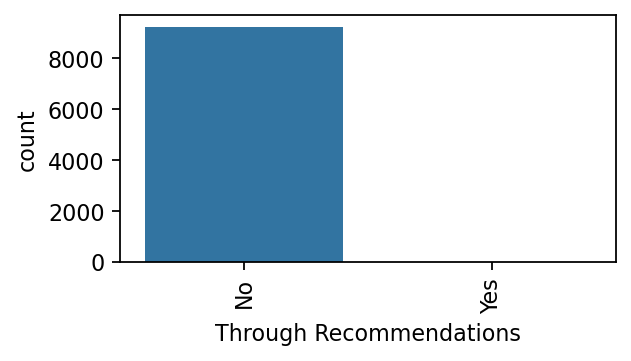

Countplot of  Tags


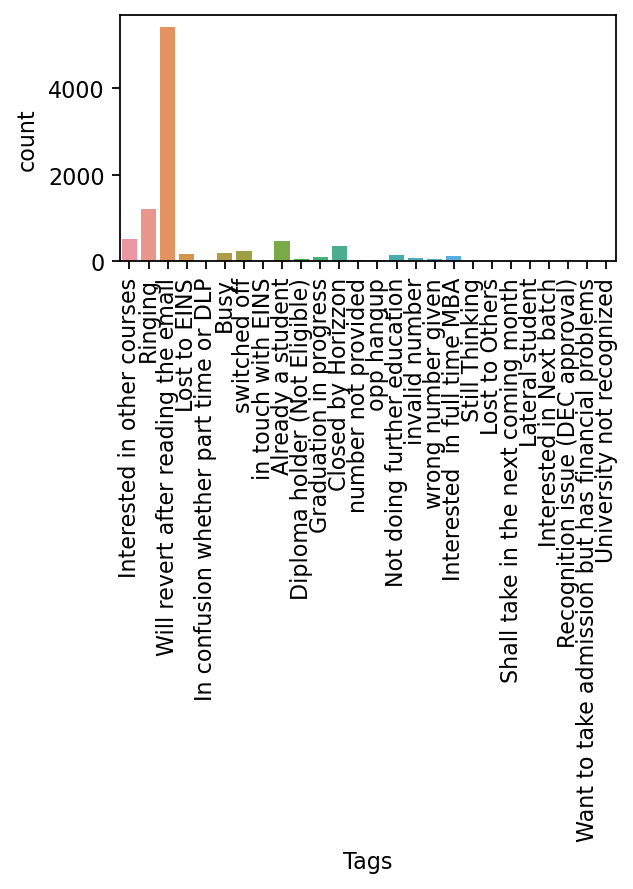

Countplot of  City


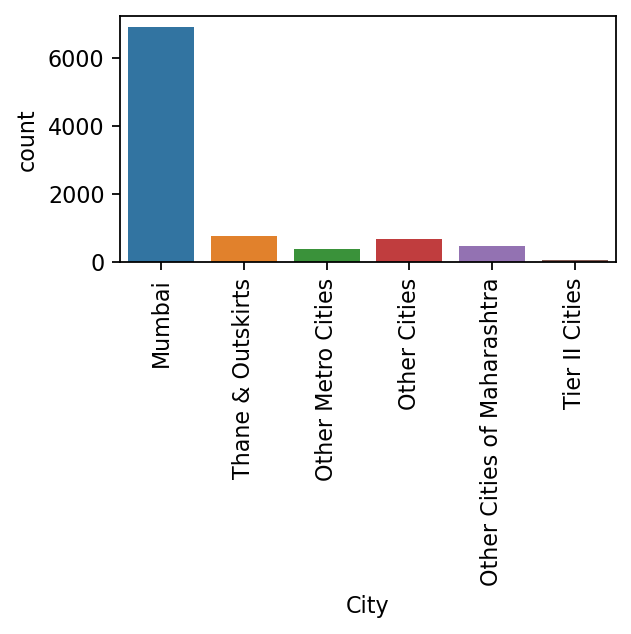

Countplot of  A free copy of Mastering The Interview


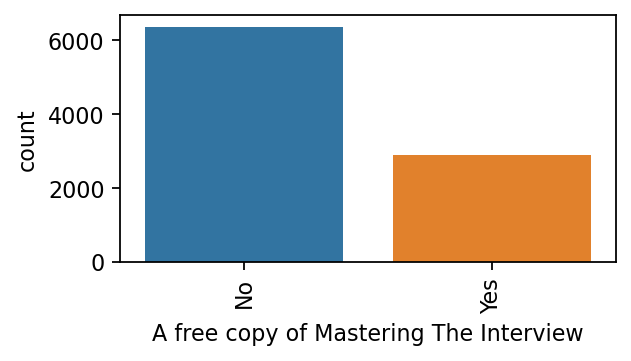

Countplot of  Last Notable Activity


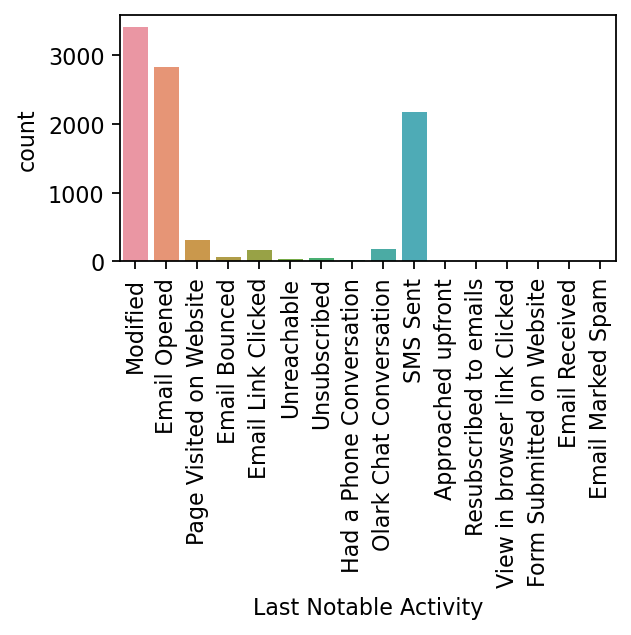

In [32]:
# Data Visualization using the Countplot of the object variables ....! 
for i in lead_obj_col:
    print("Countplot of ",i)
    plt.figure(figsize=(4,2),dpi=160)
    sns.countplot(x=df_Leads[i])
    plt.xticks(rotation=90)
    plt.show()
    
    
    


#### INSIGHTS FROM THE ABOVE COUNPLOT (CATEGORICAL DATA):

In [33]:
# Factor with which the customer was identified by lead is 'Landing page submission'. It has 53% value and the highest among the other factors.
# Maximum cutomers source for the navigation to the company's website is Google followed by direct traffic. In the era of internet it is expected also.
# Most of the customers have not choosen 'Do not mail'.
# Most of the customers have not choosed 'Do not call'.
# Email opened followed by the SMS sent were the last activity done by the customer.
# Most of the customers are from India.
# Most of the customers are unemployed.
# Most of the customers are searching for the course for their better career prospects.
# Most of the customers have not searched any of the ads related to X Education.
# Many customers have not seen the newspaper article about the course provided by the company.
# Most of the customers have not seen the ads for X Education Forum.
# Most of the customers have not seen the ads for course in newspaper .
# Most of the customers have not seen the ads for course in Didital Media as well.
# Most of the customers are not through recommendations.
# Most of the customers don't want 'free copy of mastering the interviews'.
# Modified,email open and SMS sent are the major last activities done by the students.
# Most of the customers are from finance management.
# Most of the customers are tagged as 'will revert after reading'.
# Most of the customers are from city Mumbai.

In [34]:
df_Leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
# storing the numerical variables into the lead_num_col.....!!
lead_num_col = []
for i in df_Leads.columns:
    if df_Leads[i].dtype in ('float64','int64'):
        lead_num_col.append(i)

In [36]:
print(type(lead_num_col))
print(lead_num_col)

<class 'list'>
['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


### Anlysing the Target Variable i.e Converted 

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64


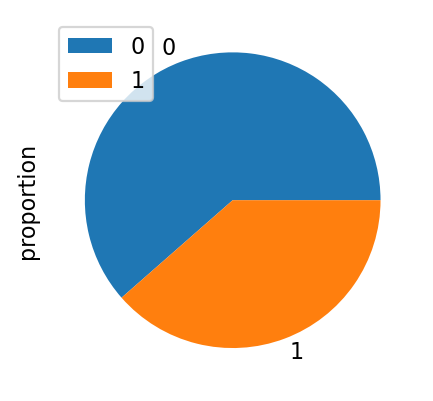

In [37]:
print(df_Leads.Converted.value_counts(normalize=True)*100)
plt.figure(figsize=(6,3),dpi=160)
df_Leads.Converted.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()


In [38]:
# Insights from the Converted column :
# Looking above  ,we can see 39 % of customers who visited the site have converted to leads or joined the course.

In [39]:
lead_num_col2 = df_Leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

Boxplot of  TotalVisits


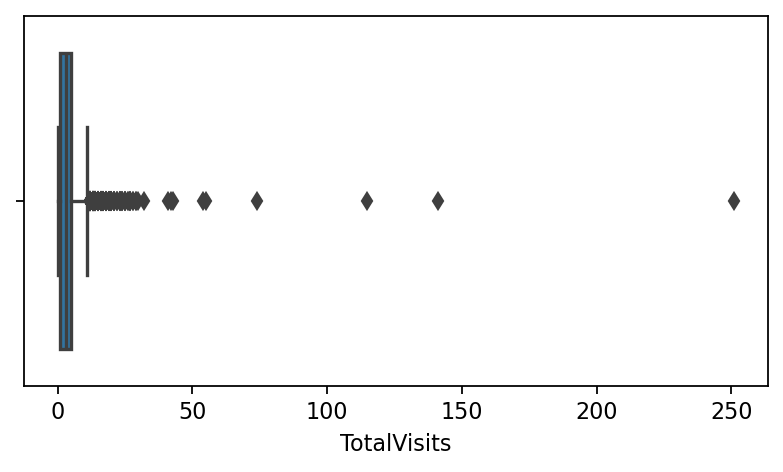

Boxplot of  Total Time Spent on Website


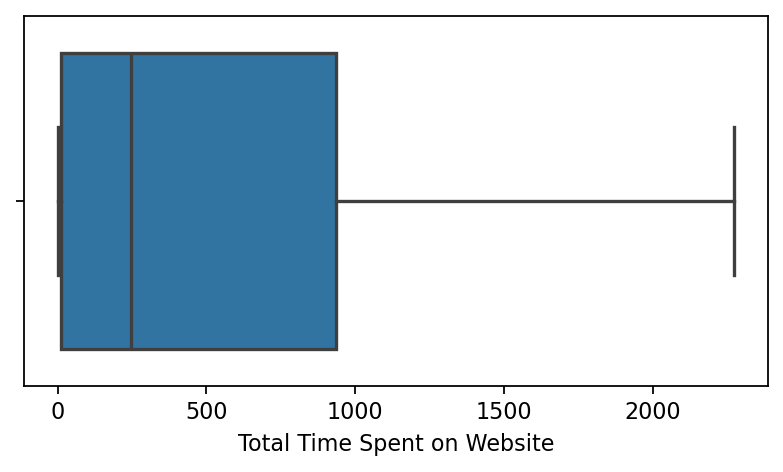

Boxplot of  Page Views Per Visit


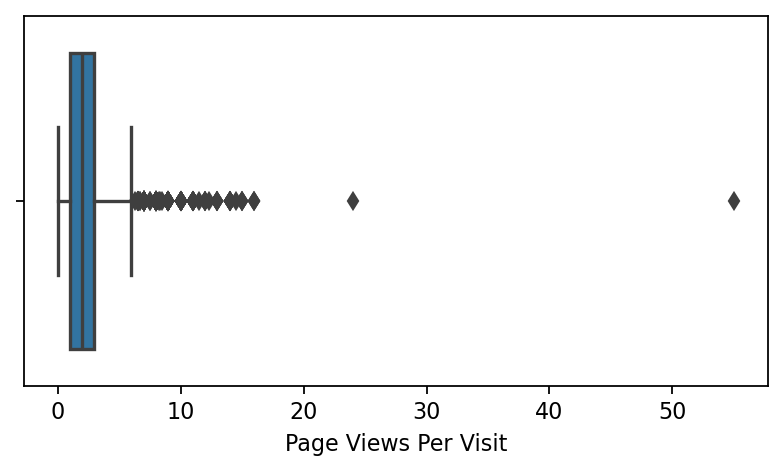

In [40]:
# Data visualization using the Boxplot of the numerical variables :
for i in lead_num_col2:
    print("Boxplot of ",i)
    plt.figure(figsize=(6,3),dpi=160)
    sns.boxplot(x=df_Leads[i])
    plt.show()

Histplot of :- TotalVisits


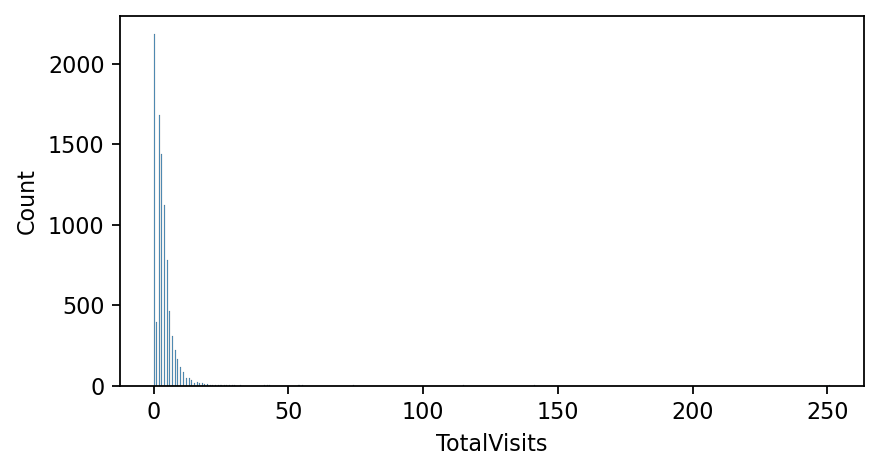

Histplot of :- Total Time Spent on Website


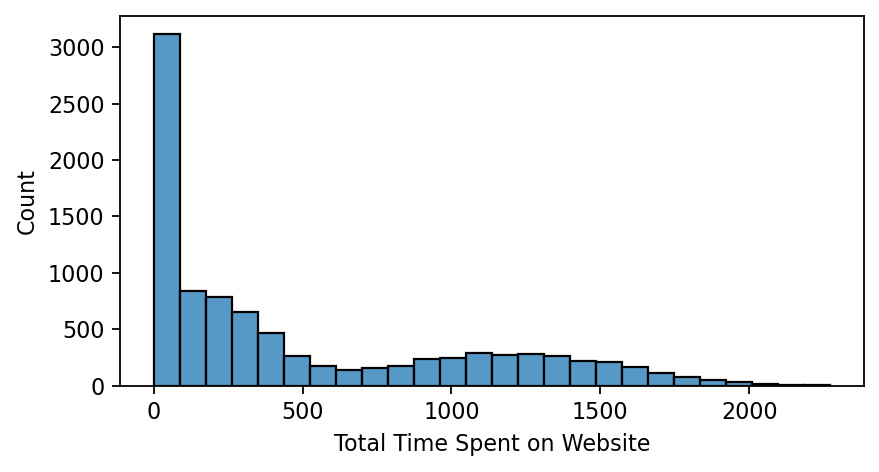

Histplot of :- Page Views Per Visit


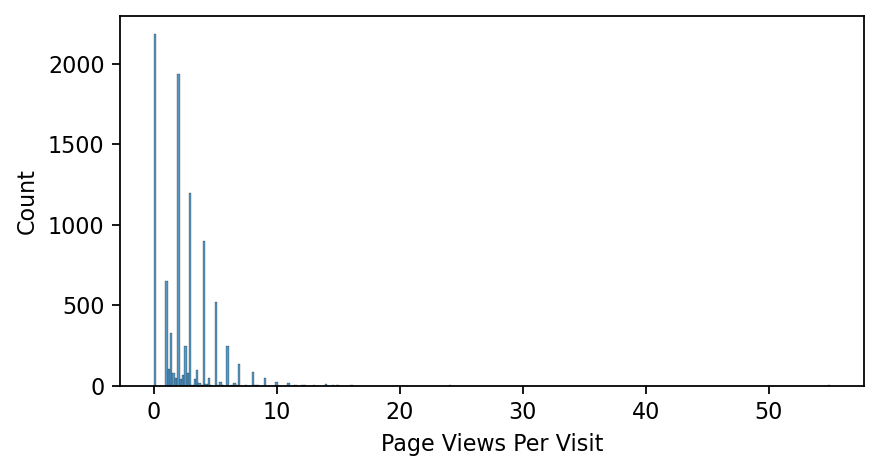

In [41]:
# Data visualization of the numeric variables using the histplot ...!! 
for i in lead_num_col2:
    print('Histplot of :-',i)
    plt.figure(figsize=(6,3),dpi=160)
    sns.histplot(x=df_Leads[i])
    plt.show()

In [42]:
# INSIGHTS FROM THE ABOVE HISTPLOT OF THE NUMERIC VARIABLES :-

# Theoretically TotalVisits have outliers around 250 but it can be ignored. Most of the values are around 0.0.
# 75% of total time spent on website is less than 1000.It's value at maximum at zero and then decreases and again increases between 1000 to 1500.
# 75% of page Views per visit is less than 5. It's value is maximum at zero and decreases till 10.insights from the above boxplot and histplot are:
# Theoretically TotalVisits have outliers around 250 but it can be ignored. Most of the values are around 0.0.
# 75% of total time spent on website is less than 1000.It's value at maximum at zero and then decreases and again increases between 1000 to 1500.
# 75% of page Views per visit is less than 5. It's value is maximum at zero and decreases till 10.

## BIVARIATE ANALYSIS OF THE DATASET :-

In [43]:
# we need to first convert the Converted variable to a string  
df_Leads['Converted'] = df_Leads['Converted'].astype('str')

Countplot of Lead Origin


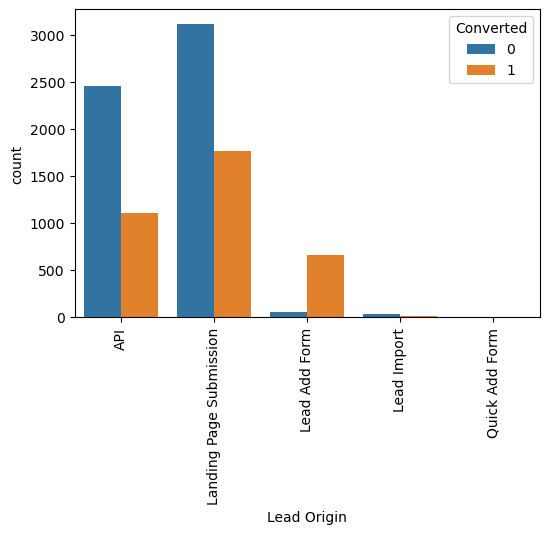

Countplot of Lead Source


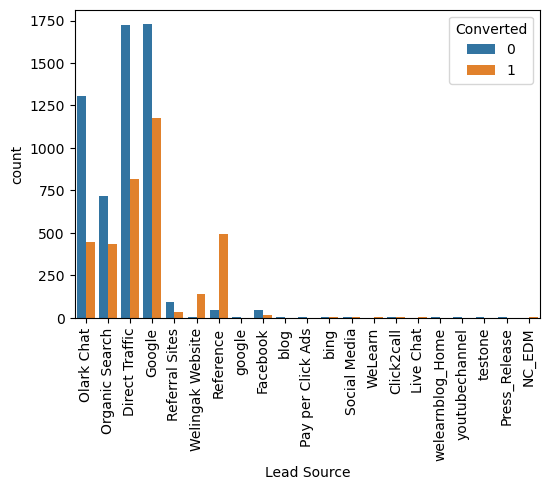

Countplot of Do Not Email


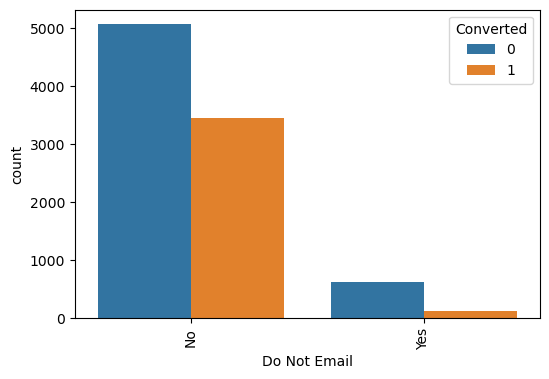

Countplot of Do Not Call


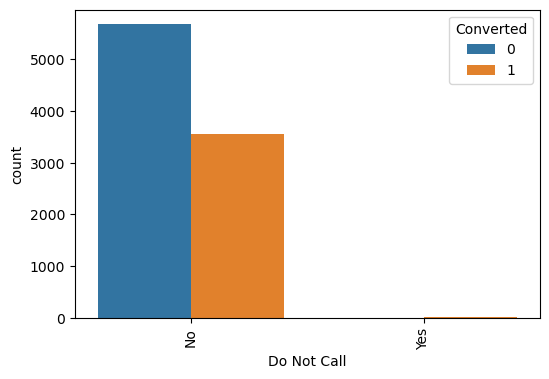

Countplot of Last Activity


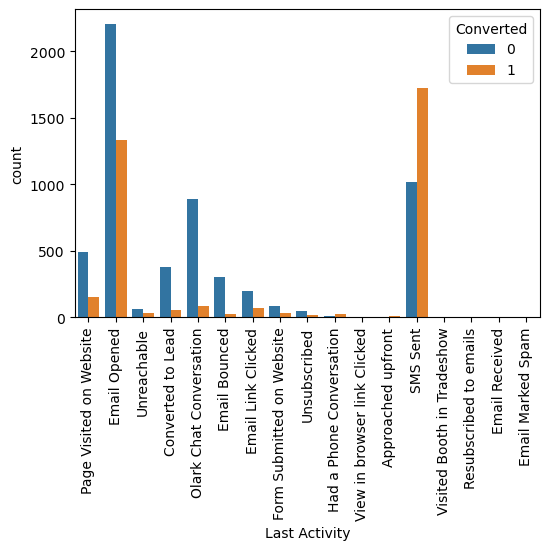

Countplot of Country


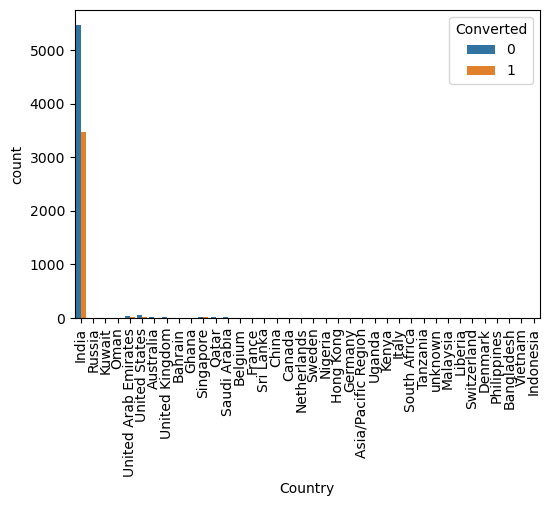

Countplot of Specialization


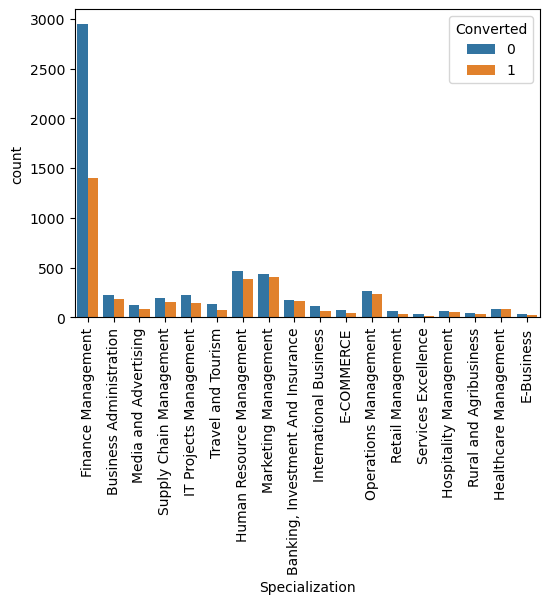

Countplot of What is your current occupation


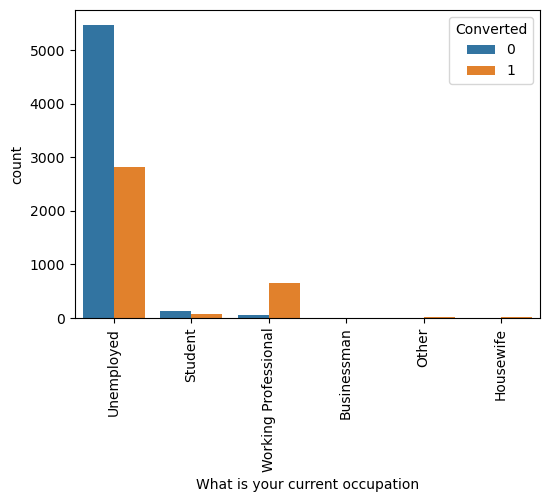

Countplot of What matters most to you in choosing a course


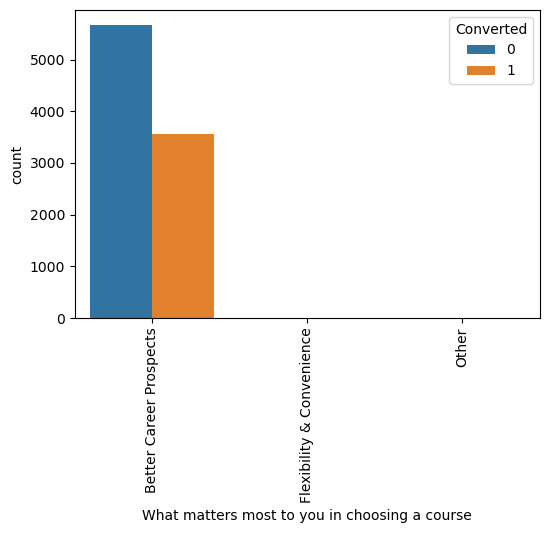

Countplot of Search


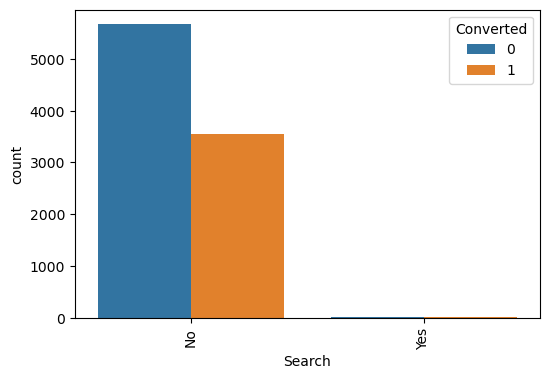

Countplot of Newspaper Article


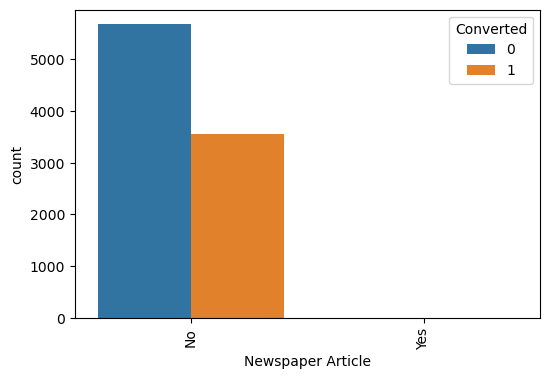

Countplot of X Education Forums


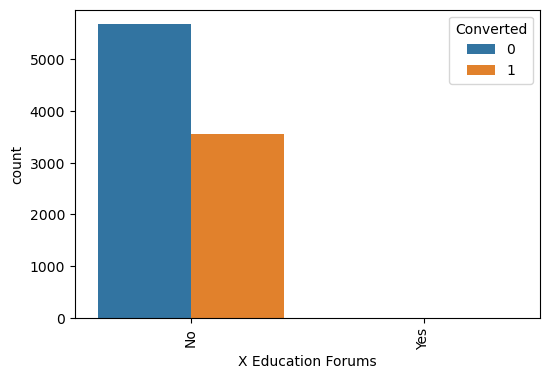

Countplot of Newspaper


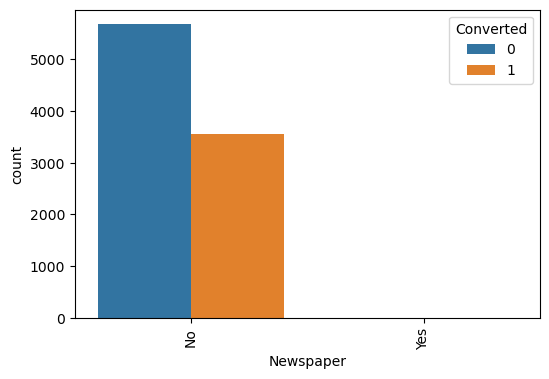

Countplot of Digital Advertisement


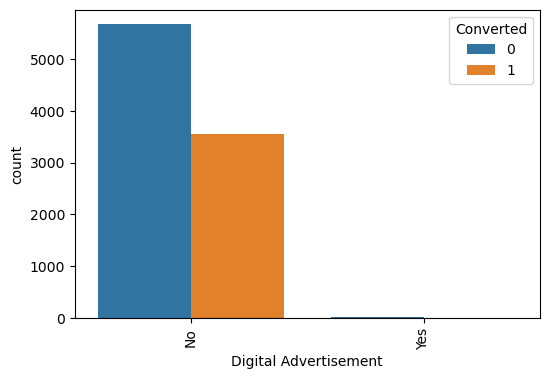

Countplot of Through Recommendations


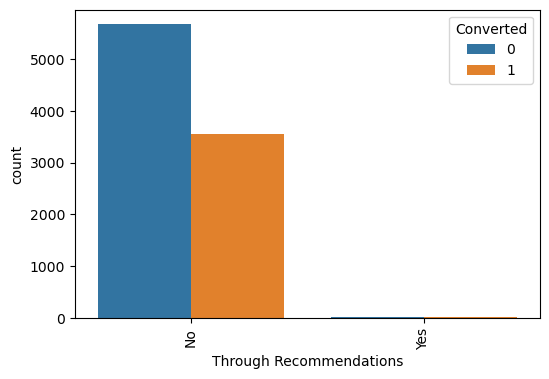

Countplot of Tags


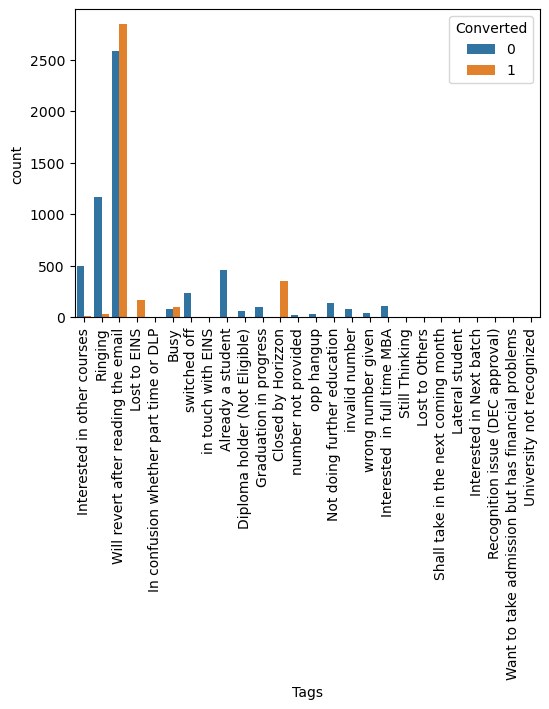

Countplot of City


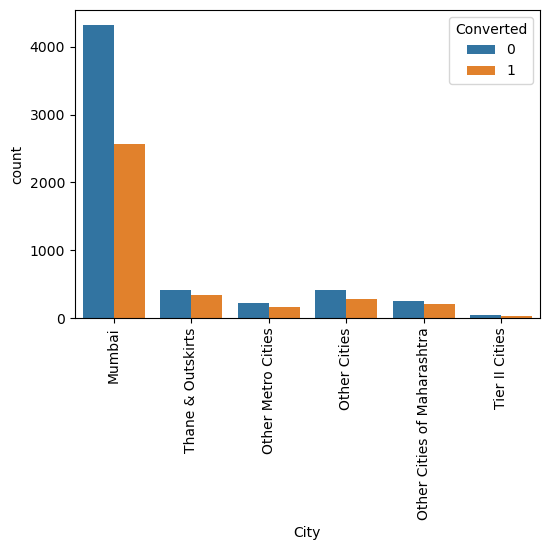

Countplot of A free copy of Mastering The Interview


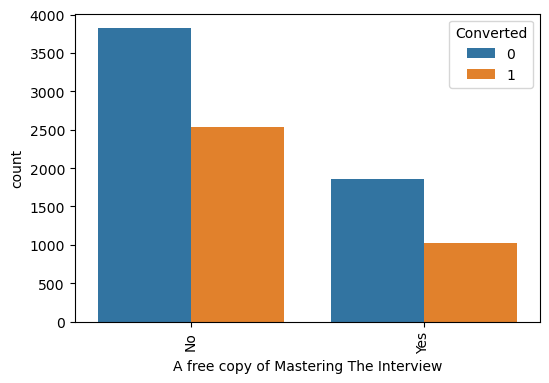

Countplot of Last Notable Activity


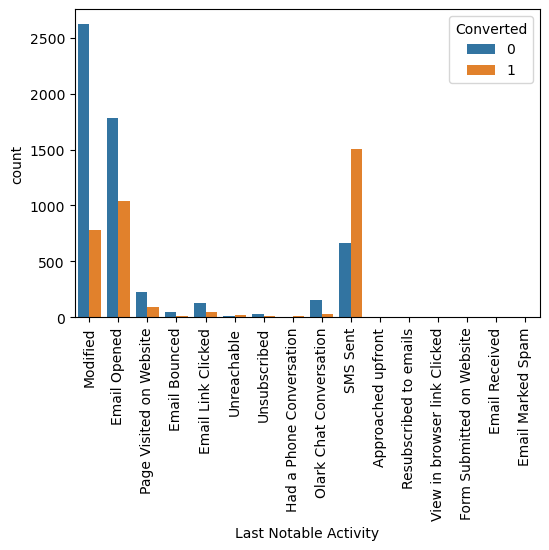

In [44]:
# Data analysis of the Categorical variables with the Converted variable :-
for i in lead_obj_col:
    print("Countplot of",i)
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_Leads[i],hue='Converted',data=df_Leads)
    plt.xticks(rotation=90)
    plt.show()

In [45]:
# INSIGHTS FROM THE ABOVE BIVARIATE ANALYSIS ARE :-

# Loading Page submission has max. number of customers getting converted. But Lead Add Form is very efficient way of converting to leads.
# Google gives the max.leads converted.Reference is giving the right faith to the customers(referred one) that's why they are more converted.
# Customer's who did not opted for 'do not email' or 'do not call' have high chance of converting to leads.
# Customers with last activity as email opened or SMS sent have more chances of converting to leads.SMS sent is proved to be more better option to influence.
# Customers from India have the more chances of converting to leads compared to outside India.
# Unemployed and the working professionals have the more influence towards taking up the course.
# Customer desiring for better career prospects are showing more conversion rate.
# Customers who have not searched about the X Education have more conversion rates.
# Customers who have not read/seen the newspaper article about the company have more conversion rates.
# People not aware of the X Education forums are converting to leads.
# People who have not read about X Education via newspaper/digital ads/recommendations have shown good conversion rates.
# Customers who haven't asked for a free copy of mastering the interview are also showing the good conversion rates.
# Last notable activity of student with SMS sent shows maximum conversion rate.
# Most of the converted leads are from India.
# People from MUmbai have good conversion rates.

TotalVisits vs Converted


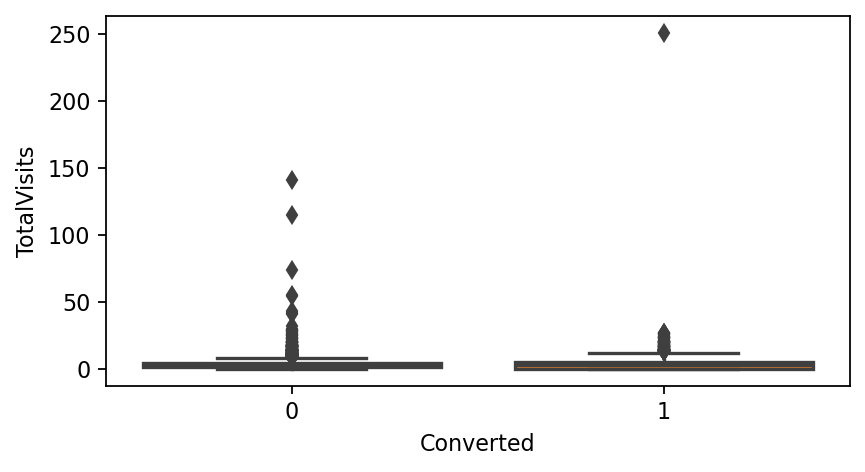

Total Time Spent on Website vs Converted


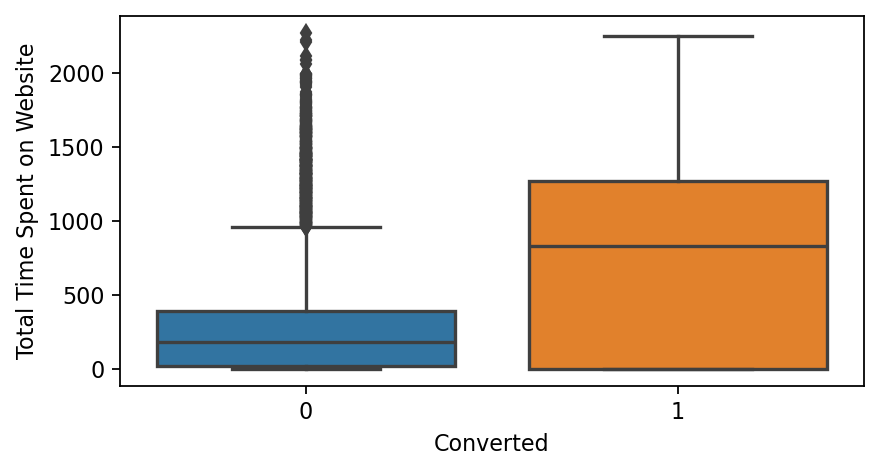

Page Views Per Visit vs Converted


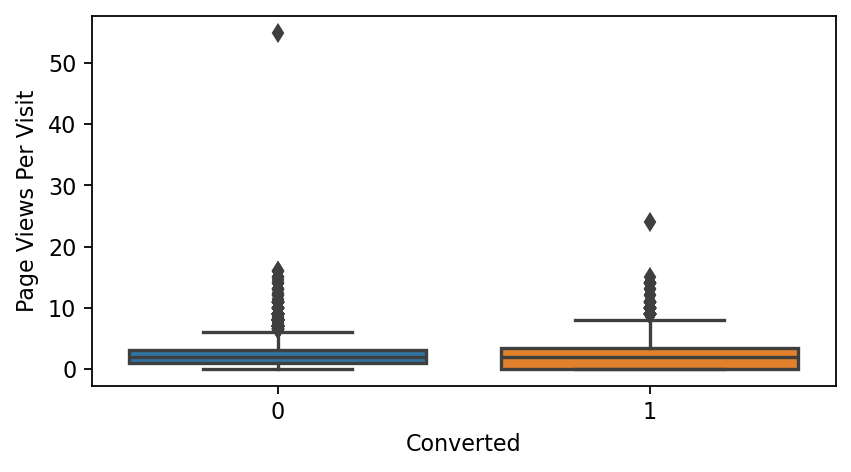

In [46]:
# Bivariate analysis of the numric variables using the boxplot :-
for i in lead_num_col2:
    print(i,'vs','Converted')
    plt.figure(figsize=(6,3),dpi=160)
    sns.boxplot(y=df_Leads[i],x=df_Leads['Converted'])
    plt.show()

In [47]:
# INSIGHTS FROM THE ABOVE BOXPLOT OF THE NUMERIC VARIABLES ARE :

# TotalVisits with extreme minimum and maximum values have the more chances of conversion.
# For total time spend on websites has more chances of conversion below 1500.
# Conversion rate is more densed around 0 to 25 for Page views per visit.

## MULTIVARIATE ANALYSIS OF THE DATASET :-

In [48]:
print(lead_num_col)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


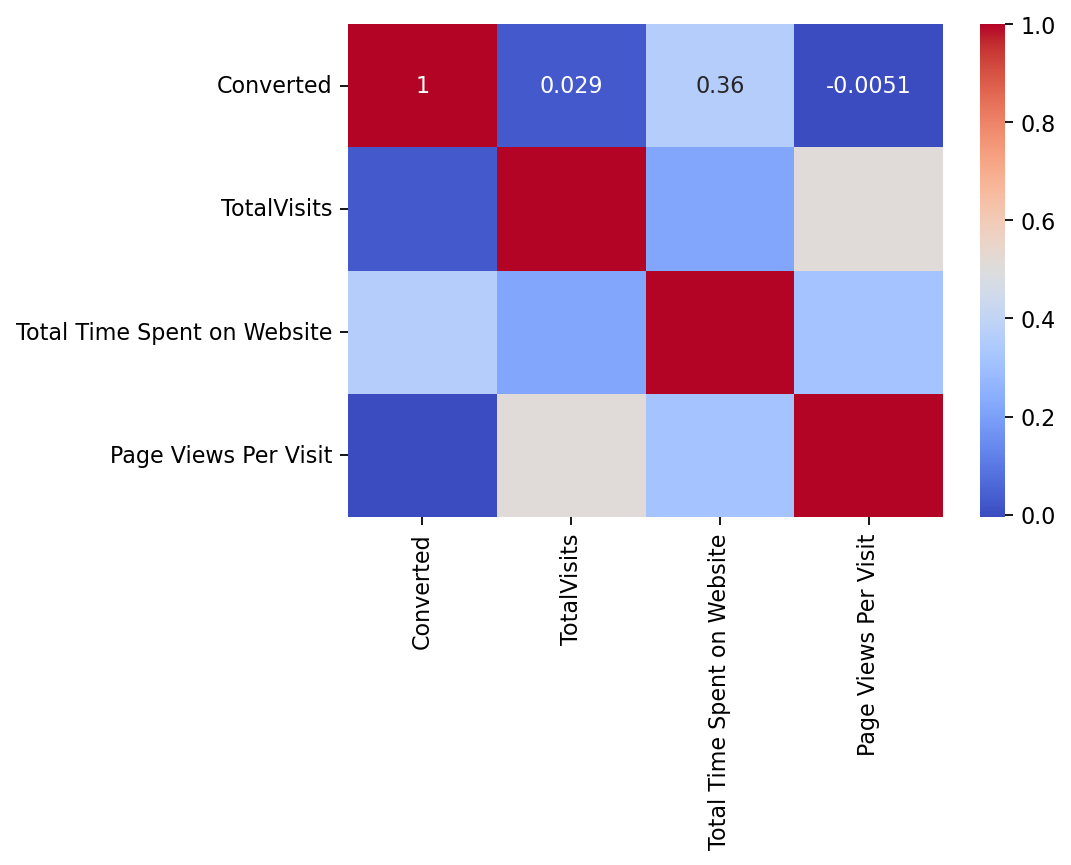

In [49]:
# DATA VISUALIZATION USING THE HEATMAP OF THE NUMERIC VARIABLES :-
plt.figure(figsize=(6,4),dpi=160)
sns.heatmap(data=df_Leads[lead_num_col].corr(),annot=True,cmap='coolwarm')
plt.show()

In [50]:
# From above EDA we can see many columns have 99% of data as one value.Dropping them.....!!
df_Leads.drop(columns=["Do Not Call","What matters most to you in choosing a course","Search","Newspaper Article","Digital Advertisement","Through Recommendations","Newspaper","X Education Forums"],inplace=True)

In [51]:
df_Leads.shape

(9240, 15)

## Creating dummy Variable.......

In [52]:
df_Leads['Converted'] = df_Leads['Converted'].astype('int64')

In [53]:
# Creating a new object column ....
obj_col =[]
for i in df_Leads.columns:
    if df_Leads[i].dtype == 'object':
        obj_col.append(i)
print(type(obj_col))
print(obj_col)
    

<class 'list'>
['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [54]:
df_Leads = pd.get_dummies(data=df_Leads,columns=obj_col,drop_first=True,dtype='int64')

In [55]:
df_Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
df_Leads.shape

(9240, 150)

### BUILDING THE MODEL....!!



In [57]:
# Importing the necessary libraries...!!
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import confusion_matrix,accuracy_score ,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 


In [58]:
# Creating the X and Y variable 
x = df_Leads.drop('Converted',axis=1)
y = df_Leads['Converted']

In [59]:
# Checking the shape of x and y 
print(x.shape,y.shape)

(9240, 149) (9240,)


In [60]:
#b Creating train and test split with 70:30 ratio 
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=100)

In [61]:
print("Train x.shape :",x_train.shape)
print("Test x.shape :",x_test.shape)
print("Train y.shape:",y_train.shape)
print("Test y.shape:",y_test.shape)

Train x.shape : (6468, 149)
Test x.shape : (2772, 149)
Train y.shape: (6468,)
Test y.shape: (2772,)


In [62]:
scaler = StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()
                                                                                                   

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.100767,0.005716,-0.470569,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.290067,1.365219,1.226321,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
x_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,3.295653e-17,-6.701161e-17,-1.428116e-17,0.528139,0.079468,0.005102,0.000155,0.271490,0.005102,0.320037,...,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.444763,0.071252,0.466527,...,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,-6.564336e-01,-8.853708e-01,-1.085519e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-4.671335e-01,-8.634138e-01,-6.231508e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-8.853323e-02,-4.352528e-01,-1.607829e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.900670e-01,8.098906e-01,3.015850e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,4.685790e+01,3.271816e+00,2.434472e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## Feature Selection and Model Building 

In [64]:
estimator = LogisticRegression()
features = RFE(estimator,n_features_to_select=15)
features = features.fit(x_train,y_train)
features

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [65]:
features_ranking = pd.DataFrame({'Feature Names':x_train.columns,'Support':features.support_,'Ranking':features.ranking_})
features_ranking.head()

,Feature Names,Support,Ranking
0,TotalVisits,False,90
1,Total Time Spent on Website,False,12
2,Page Views Per Visit,False,107
3,Lead Origin_Landing Page Submission,False,29
4,Lead Origin_Lead Add Form,True,1


In [66]:
features_ranking.sort_values(by='Ranking',ascending=True).head(15)

,Feature Names,Support,Ranking
145,Last Notable Activity_SMS Sent,True,1
103,Tags_Busy,True,1
104,Tags_Closed by Horizzon,True,1
109,Tags_Interested in Next batch,True,1
111,Tags_Lateral student,True,1
112,Tags_Lost to EINS,True,1
116,Tags_Ringing,True,1
121,Tags_Will revert after reading the email,True,1
122,Tags_in touch with EINS,True,1
126,Tags_switched off,True,1


In [67]:
col_to_keep = x_train.columns[features.support_]
print(col_to_keep)

Index(['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [68]:
x_train = x_train[col_to_keep]

In [69]:
x_train.head(2)

,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
1871,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Model 1

In [70]:
x_train_sm = sm.add_constant(x_train)
model1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.8
Date:                Wed, 15 Jan 2025   Deviance:                       4147.6
Time:                        16:47:54   Pearson chi2:                 1.16e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0978      0.208    -19.689      0.000      -4.506      -3.690
Lead Origin_Lead Add Form                                2.4038      0.213     11.271      0.000       1.986       2.822
Do Not Email_Yes                                        -1.4320      0.171     -8.354      0.000      -1.768      -1.096
Last Activity_Olark Chat Conversation                   -1.7036      0.164    -10.377      0.000      -2.025      -1.382
What is your current occupation_Working Professional     2.8980      0.232     12.509      0.000       2.444       3.352
Tags_Busy                                                3.0193      0.298     10.141      0.000       2.436       3.603
Tags_Closed by Horizzon                                  8.7506      1.027      8.520      0.000       6.738      10.764
Tags_Interested in Next batch                           24.4030      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Tags_Lateral student                                    25.8717   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Tags_Lost to EINS                                        8.2410      0.750     10.986      0.000       6.771       9.711
Tags_Ringing                                            -1.1039      0.305     -3.622      0.000      -1.701      -0.507
Tags_Will revert after reading the email                 3.5918      0.209     17.168      0.000       3.182       4.002
Tags_in touch with EINS                                  2.9423      0.763      3.858      0.000       1.448       4.437
Tags_switched off                                       -1.2705      0.555     -2.290      0.022      -2.358      -0.183
Last Notable Activity_Had a Phone Conversation           3.5546      1.312      2.709      0.007       0.983       6.127
Last Notable Activity_SMS Sent                           2.4830      0.109     22.757      0.000       2.269       2.697
========================================================================================================================
"""

In [71]:
# Calculation of Variance Inflation Factor (VIF)...!!
def vif_cal(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif 
    

In [72]:
vif_cal(x_train_sm)

,Feature,VIF
0,const,6.165801
11,Tags_Will revert after reading the email,1.886272
10,Tags_Ringing,1.581948
6,Tags_Closed by Horizzon,1.366388
1,Lead Origin_Lead Add Form,1.202447
15,Last Notable Activity_SMS Sent,1.161790
13,Tags_switched off,1.149402
5,Tags_Busy,1.115063
4,What is your current occupation_Working Profes...,1.092620
9,Tags_Lost to EINS,1.086181


In [73]:
# INFERENCES :
# p-value is higher in 'Tags_Interested in Next batch'

In [74]:
# Dropping the 'ags_Interested in Next batch' column
x_train = x_train.drop('Tags_Interested in Next batch',axis=1)
x_train.shape

(6468, 14)

## Model 2

In [75]:
x_train_sm = sm.add_constant(x_train)
model2 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.4
Date:                Wed, 15 Jan 2025   Deviance:                       4164.7
Time:                        16:47:55   Pearson chi2:                 1.15e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9621      0.195    -20.336      0.000      -4.344      -3.580
Lead Origin_Lead Add Form                                2.4084      0.213     11.333      0.000       1.992       2.825
Do Not Email_Yes                                        -1.4112      0.170     -8.278      0.000      -1.745      -1.077
Last Activity_Olark Chat Conversation                   -1.6999      0.164    -10.362      0.000      -2.021      -1.378
What is your current occupation_Working Professional     2.8713      0.229     12.555      0.000       2.423       3.320
Tags_Busy                                                2.8685      0.289      9.930      0.000       2.302       3.435
Tags_Closed by Horizzon                                  8.6138      1.024      8.409      0.000       6.606      10.622
Tags_Lateral student                                    24.7324   1.39e+04      0.002      0.999   -2.71e+04    2.72e+04
Tags_Lost to EINS                                        8.1037      0.746     10.856      0.000       6.641       9.567
Tags_Ringing                                            -1.2660      0.295     -4.285      0.000      -1.845      -0.687
Tags_Will revert after reading the email                 3.4508      0.196     17.614      0.000       3.067       3.835
Tags_in touch with EINS                                  2.8037      0.760      3.689      0.000       1.314       4.293
Tags_switched off                                       -1.4323      0.550     -2.605      0.009      -2.510      -0.355
Last Notable Activity_Had a Phone Conversation           3.5044      1.287      2.724      0.006       0.983       6.026
Last Notable Activity_SMS Sent                           2.5137      0.109     22.993      0.000       2.299       2.728
========================================================================================================================
"""

In [76]:
vif_cal(x_train_sm)

,Feature,VIF
0,const,6.144852
10,Tags_Will revert after reading the email,1.877428
9,Tags_Ringing,1.577391
6,Tags_Closed by Horizzon,1.365415
1,Lead Origin_Lead Add Form,1.202217
14,Last Notable Activity_SMS Sent,1.157221
12,Tags_switched off,1.148169
5,Tags_Busy,1.114103
4,What is your current occupation_Working Profes...,1.092423
8,Tags_Lost to EINS,1.085818


In [77]:
# INFERENCES :
# Tags_Lateral student has highest p-value.

In [78]:
x_train = x_train.drop('Tags_Lateral student',axis=1)

## Model 3

In [79]:
x_train_sm = sm.add_constant(x_train)
model3 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Wed, 15 Jan 2025   Deviance:                       4181.1
Time:                        16:47:56   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8818      0.188    -20.594      0.000      -4.251      -3.512
Lead Origin_Lead Add Form                                2.4157      0.212     11.395      0.000       2.000       2.831
Do Not Email_Yes                                        -1.4143      0.170     -8.306      0.000      -1.748      -1.081
Last Activity_Olark Chat Conversation                   -1.7018      0.164    -10.380      0.000      -2.023      -1.380
What is your current occupation_Working Professional     2.8545      0.227     12.575      0.000       2.410       3.299
Tags_Busy                                                2.7904      0.285      9.806      0.000       2.233       3.348
Tags_Closed by Horizzon                                  8.5334      1.023      8.340      0.000       6.528      10.539
Tags_Lost to EINS                                        8.0240      0.745     10.772      0.000       6.564       9.484
Tags_Ringing                                            -1.3429      0.291     -4.611      0.000      -1.914      -0.772
Tags_Will revert after reading the email                 3.3717      0.190     17.778      0.000       3.000       3.743
Tags_in touch with EINS                                  2.7239      0.758      3.592      0.000       1.238       4.210
Tags_switched off                                       -1.5079      0.548     -2.754      0.006      -2.581      -0.435
Last Notable Activity_Had a Phone Conversation           3.4726      1.273      2.728      0.006       0.978       5.968
Last Notable Activity_SMS Sent                           2.5090      0.109     23.031      0.000       2.295       2.722
========================================================================================================================
"""

In [80]:
vif_cal(x_train_sm)

,Feature,VIF
0,const,6.128651
9,Tags_Will revert after reading the email,1.873031
8,Tags_Ringing,1.575313
6,Tags_Closed by Horizzon,1.364268
1,Lead Origin_Lead Add Form,1.201378
13,Last Notable Activity_SMS Sent,1.157102
11,Tags_switched off,1.147691
5,Tags_Busy,1.113735
4,What is your current occupation_Working Profes...,1.092352
7,Tags_Lost to EINS,1.085516


In [81]:
# INFERENCES :
# Tags_switched off has the highest p-value 
x_train = x_train.drop('Tags_switched off',axis=1)

## Model 4

In [82]:
x_train_sm = sm.add_constant(x_train)
model4 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.7
Date:                Wed, 15 Jan 2025   Deviance:                       4191.5
Time:                        16:47:57   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4941
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1657      0.181    -23.071      0.000      -4.520      -3.812
Lead Origin_Lead Add Form                                2.4334      0.213     11.437      0.000       2.016       2.850
Do Not Email_Yes                                        -1.4147      0.170     -8.328      0.000      -1.748      -1.082
Last Activity_Olark Chat Conversation                   -1.7044      0.164    -10.383      0.000      -2.026      -1.383
What is your current occupation_Working Professional     2.8952      0.230     12.565      0.000       2.444       3.347
Tags_Busy                                                3.0969      0.275     11.253      0.000       2.558       3.636
Tags_Closed by Horizzon                                  8.8152      1.022      8.627      0.000       6.813      10.818
Tags_Lost to EINS                                        8.3085      0.743     11.183      0.000       6.852       9.765
Tags_Ringing                                            -1.0217      0.280     -3.643      0.000      -1.571      -0.472
Tags_Will revert after reading the email                 3.6612      0.180     20.293      0.000       3.308       4.015
Tags_in touch with EINS                                  3.0123      0.755      3.992      0.000       1.533       4.491
Last Notable Activity_Had a Phone Conversation           3.5809      1.325      2.703      0.007       0.985       6.177
Last Notable Activity_SMS Sent                           2.4601      0.107     23.074      0.000       2.251       2.669
========================================================================================================================
"""

In [83]:
vif_cal(x_train_sm)

,Feature,VIF
0,const,5.374701
9,Tags_Will revert after reading the email,1.667550
8,Tags_Ringing,1.468771
6,Tags_Closed by Horizzon,1.341384
1,Lead Origin_Lead Add Form,1.200724
12,Last Notable Activity_SMS Sent,1.137888
5,Tags_Busy,1.093741
4,What is your current occupation_Working Profes...,1.091608
7,Tags_Lost to EINS,1.073491
3,Last Activity_Olark Chat Conversation,1.067201


In [84]:
# INFERENCES:
# 'Last Notable Activity_Had a Phone Conversation' column  has the highest p-value
x_train = x_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1)
x_train.shape


(6468, 11)

## Model 5

In [85]:
x_train_sm = sm.add_constant(x_train)
model5 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial())
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2102.9
Date:                Wed, 15 Jan 2025   Deviance:                       4205.8
Time:                        16:47:58   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1502      0.180    -23.042      0.000      -4.503      -3.797
Lead Origin_Lead Add Form                                2.4260      0.213     11.398      0.000       2.009       2.843
Do Not Email_Yes                                        -1.4224      0.170     -8.382      0.000      -1.755      -1.090
Last Activity_Olark Chat Conversation                   -1.7152      0.164    -10.453      0.000      -2.037      -1.394
What is your current occupation_Working Professional     2.8939      0.230     12.587      0.000       2.443       3.345
Tags_Busy                                                3.0865      0.275     11.234      0.000       2.548       3.625
Tags_Closed by Horizzon                                  8.8013      1.022      8.614      0.000       6.799      10.804
Tags_Lost to EINS                                        8.2961      0.743     11.167      0.000       6.840       9.752
Tags_Ringing                                            -1.0274      0.280     -3.667      0.000      -1.576      -0.478
Tags_Will revert after reading the email                 3.6567      0.180     20.310      0.000       3.304       4.010
Tags_in touch with EINS                                  2.9980      0.754      3.975      0.000       1.520       4.476
Last Notable Activity_SMS Sent                           2.4501      0.107     22.999      0.000       2.241       2.659
========================================================================================================================
"""

In [86]:
vif_cal(x_train_sm)

,Feature,VIF
0,const,5.372981
9,Tags_Will revert after reading the email,1.666810
8,Tags_Ringing,1.468760
6,Tags_Closed by Horizzon,1.341357
1,Lead Origin_Lead Add Form,1.200517
11,Last Notable Activity_SMS Sent,1.136807
5,Tags_Busy,1.093741
4,What is your current occupation_Working Profes...,1.091297
7,Tags_Lost to EINS,1.073469
3,Last Activity_Olark Chat Conversation,1.066669


## Inferences :
### All p-values and VIF's are within the range. We can accept model5 as final model.....!!

## EVALUATING THE MODEL :

In [87]:
# Creating the y_train_pred using the model5
y_train_pred = result5.predict(x_train_sm)

In [88]:
# Coverted into array y_train_pred 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.00560978, 0.37906063, 0.00560978, ..., 0.37906063, 0.0155164 ,
       0.37906063])

In [89]:
# Making the DataFrame 
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.005610,1871
1,0,0.379061,6795
2,0,0.005610,3516
3,0,0.061367,8105
4,0,0.379061,3934


In [90]:
# Prediction using the Converted_Prob column 
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x>0.5 else 0)

In [91]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.005610,1871,0
1,0,0.379061,6795,0
2,0,0.005610,3516,0
3,0,0.061367,8105,0
4,0,0.379061,3934,0


In [92]:
# Creating the Confusion Matrix 
confusion = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confusion)

[[3873  129]
 [ 793 1673]]


In [93]:
# Evaluation of confusion matrix 
print('Accuracy Score :',100*accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))
print('Precision Score :',100*precision_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))
print('Recall Score :',100*recall_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))
print('F1 Score :',100*f1_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))
      

Accuracy Score : 85.74520717377861
Precision Score : 92.84128745837957
Recall Score : 67.84266017842661
F1 Score : 78.39737582005623


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
#false positive rate i.e these percent of cutomers could not convert.

In [96]:
print(100* FP/ float(TN+FP))

3.2233883058470765


In [97]:
#positive predictive value
print(100*TP/float(TP+FP))

92.84128745837958


In [98]:
#Negative predictive value
print (100*TN / float(TN+ FN))

83.0047149592799


### Plotting the ROC (Receiver Operating Characteristic curve) to find out the Trade-off between TPR AND FPR 


In [99]:
def draw_roc(actual,prob):
    fpr,tpr,thresholds = roc_curve(actual,prob,drop_intermediate=False)
    auc_score = roc_auc_score(actual,prob)
    plt.figure(figsize=(5,3),dpi=160)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1])
    plt.xlabel('False Positive Rate(FPR) or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None
    

In [100]:
fpr,tpr,thresholds = roc_curve(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'],drop_intermediate = False )

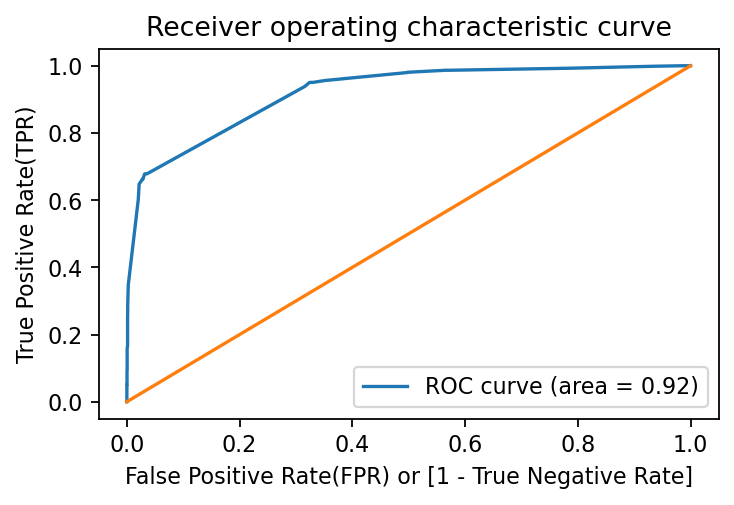

In [101]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

# Optimal cutoff

In [102]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0


In [103]:
# Checking the accuracy_score,sensitivity or recall and specifity for the different probability cutoffs
cutoff_df = pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specifity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in  num:
    confusion = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    total1 = sum(sum(confusion))
    Accuracy = ( confusion[0,0]+ confusion[1,1])/total1
    Sensitivity =  confusion[1,1]/( confusion[1,0]+ confusion[1,1])
    Specifity =  confusion[0,0]/( confusion[0,0]+ confusion[0,1])
    cutoff_df.loc[int(10*i)] =[ i ,Accuracy,Sensitivity,Specifity]
print(cutoff_df)
    

   Probability  Accuracy  Sensitivity  Specifity
0          0.0  0.381262     1.000000   0.000000
1          0.1  0.737786     0.964315   0.598201
2          0.2  0.776747     0.950527   0.669665
3          0.3  0.781231     0.938362   0.684408
4          0.4  0.855288     0.678427   0.964268
5          0.5  0.857452     0.678427   0.967766
6          0.6  0.857761     0.678427   0.968266
7          0.7  0.853896     0.663828   0.971014
8          0.8  0.854205     0.662206   0.972514
9          0.9  0.749845     0.347932   0.997501


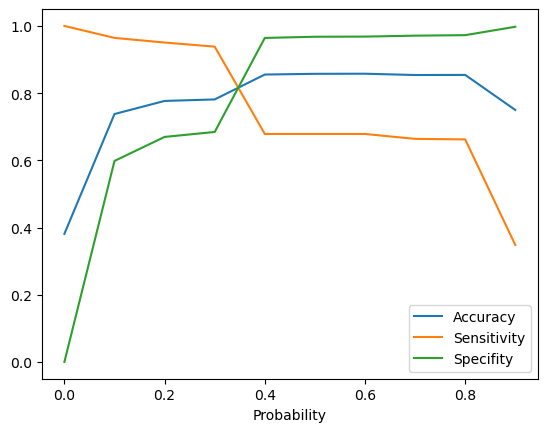

In [104]:
cutoff_df.plot.line(x='Probability',y=['Accuracy','Sensitivity','Specifity'])
plt.show()

In [105]:
# Inferences:-
# cutoff from the above line plot will be taken as 0.35 or 0.38 (approximately)

In [106]:
#taking cutoff=.35 and evaluating final predicted value.
y_train_pred_final['Final cutoff'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final cutoff
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [107]:
# As per cutoff=0.35, adding the leadscore
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_Prob'].map(lambda x:round(x*100))

In [108]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final cutoff,Lead Score
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0,1,38
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0,0,6
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0,1,38


In [109]:
# Confusion Matrix 
confusion_2 = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Final cutoff'])
print(confusion_2)

[[2739 1263]
 [ 152 2314]]


In [110]:
# Checking the accuracy,recall,precision and f1 score 
print('Accuracy Score :',100*accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final cutoff']))
print('Recall Score :',100*recall_score(y_train_pred_final['Converted'],y_train_pred_final['Final cutoff']))
print('Precision Score :',100*precision_score(y_train_pred_final['Converted'],y_train_pred_final['Final cutoff']))
print('F1 Score :',100*f1_score(y_train_pred_final['Converted'],y_train_pred_final['Final cutoff']))



      

Accuracy Score : 78.1230674087817
Recall Score : 93.83617193836173
Precision Score : 64.69108191221694
F1 Score : 76.58447790832368


In [111]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [112]:
#False Postive Rate
print(100*FP/ float(TN+FP))

#Positive predictive value
print (100*TP / float(TP+FP))

#Negative predictive value
print (100*TN / float(TN+ FN))

31.5592203898051
64.69108191221694
94.74230370114148


In [113]:
# Plotting precision-recall curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

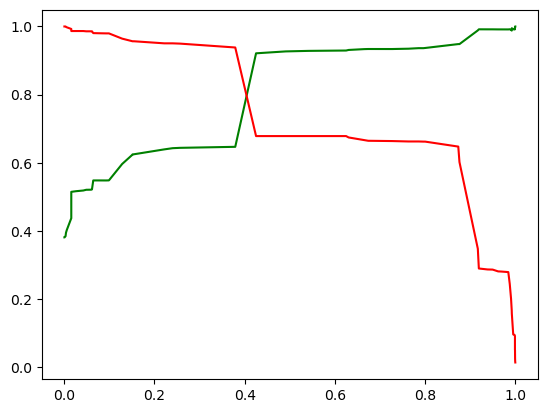

In [114]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [115]:
# Checking the results at a cutoff of 0.38
y_train_pred_final['Final_cutoff_0.38'] = y_train_pred_final['Converted_Prob'].map(lambda x:1 if x>0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final cutoff,Lead Score,Final_cutoff_0.38
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0,1,38,0
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0,0,6,0
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0,1,38,0


In [116]:
# Checking the accuracy,recall,precision and f1 score 
print('Accuracy Score :',100*accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final_cutoff_0.38']))
print('Recall Score :',100*recall_score(y_train_pred_final['Converted'],y_train_pred_final['Final_cutoff_0.38']))
print('Precision Score :',100*precision_score(y_train_pred_final['Converted'],y_train_pred_final['Final_cutoff_0.38']))
print('F1 Score :',100*f1_score(y_train_pred_final['Converted'],y_train_pred_final['Final_cutoff_0.38']))

Accuracy Score : 85.52875695732838
Recall Score : 67.84266017842661
Precision Score : 92.12555066079295
F1 Score : 78.14105558150398


In [117]:
confusionMatrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_cutoff_0.38'])
print(confusionMatrix)

[[3859  143]
 [ 793 1673]]


In [118]:
# using the x test dataset 
leads_numeric_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
x_test[leads_numeric_col] = scaler.fit_transform(x_test[leads_numeric_col])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,1.320947,0.933036,2.669778,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-0.961886,-0.900812,-1.130671,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0.464884,-0.793792,1.244609,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,-0.961886,-0.900812,-1.130671,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-0.961886,-0.900812,-1.130671,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
x_test = x_test[col_to_keep]
x_test.head()

,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7766,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4359,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Prediction on the Test Datset 

In [120]:
final_col = x_train.columns.to_list()
print(final_col)

['Lead Origin_Lead Add Form', 'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Last Notable Activity_SMS Sent']


In [121]:
x_test_sm = sm.add_constant(x_test[final_col])


In [122]:
y_test_pred = result5.predict(x_test_sm)
print(y_test_pred)

4269    0.876156
2376    0.987660
7766    0.916856
9199    0.002828
4359    0.873522
          ...   
8649    0.379061
2152    0.987660
7101    0.015516
5331    0.128313
2960    0.987660
Length: 2772, dtype: float64


In [123]:
# Creating the Dataframe 
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
4269,0.876156
2376,0.987660
7766,0.916856
9199,0.002828
4359,0.873522


In [124]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [125]:
y_test_df['Prospect ID'] = y_test_df.index

In [126]:
y_test_df.head()

,Converted,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [127]:
# Reseting the index 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
#Concatinating the two dataframes 
y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

In [129]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.876156
1,1,2376,0.987660
2,1,7766,0.916856
3,0,9199,0.002828
4,1,4359,0.873522


In [130]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.876156
1,1,2376,0.987660
2,1,7766,0.916856
3,0,9199,0.002828
4,1,4359,0.873522


In [131]:
# Adding lead score to the test data frame
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))

In [132]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4269,1,0.876156,88
1,2376,1,0.987660,99
2,7766,1,0.916856,92
3,9199,0,0.002828,0
4,4359,1,0.873522,87


In [133]:
#mEvaluating the final predicted value cutoff=0.35
y_pred_final['Final_Predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [134]:
# Calculating the matrix
print("Accuracy Score : ",100*accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
print("Recall Score : ",100*recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
print("Precision Score: ",100*precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
print("F1 Score: ",100*f1_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Accuracy Score :  78.28282828282829
Recall Score :  94.79452054794521
Precision Score:  65.57169930511687
F1 Score:  77.52053771471248


In [135]:
confusionMatrix = confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusionMatrix

array([[1132,  545],
       [  57, 1038]], dtype=int64)

In [136]:
# Final Observation:
# Let us compare the values obtained for Train & Test:

# Train Data:
# Accuracy: 78.12%
# Recall: 93.83%
# Precision: 64.69%
# F1 Score:  76.58%

# Test Data:
# Accuracy: 78.28%
# Recall: 94.79%
# Precision: 65.57%
# F1 Score:  77.52%

# Inferernce:
# We can see that that at cut off 0.35 recall value is very good and we can go for it. Model is explaining well the conversion rate. Test data and train data are in sync and acceptable.

# Final Features are:
# Lead Origin_Lead Add Form
# Do Not Email_Yes
# Last Activity_Olark Chat Conversation
# What is your current occupation_Working Professional
# Tags_Busy
# Tags_Closed by Horizzon
# Tags_Lost to EINS
# Tags_Ringing
# Tags_Will revert after reading the email
# Tags_in touch with EINS
# Last Notable Activity_SMS Sent